<a href="https://colab.research.google.com/github/yovieridwan17/Gym-Member-Analysis/blob/main/Gym_Member_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [41]:
df = pd.read_csv("gym_members.csv")
df.head(5)

,Member_ID,Name,Age,Gender,Address,Phone_Number,Membership_Type,Join_Date,Last_Visit_Date,Favorite_Exercise,Avg_Workout_Duration_Min,Avg_Calories_Burned,Total_Weight_Lifted_kg,Visits_Per_Month,Churn
0,1,NaN,19.0,Male,"Street 171, City 39",032-51510359,Quarterly,2022-07-23,2022-11-03,Pull-ups,93,214.0,13995.0,18.0,No
1,2,Shanza,19.0,Female,"Street 111, City 18",039-19243328,Monthly,2023-12-04,2024-02-14,Squats,37,436.0,4612.0,11.0,No
2,3,Ubaidullah,52.0,Male,"Street 69, City 21",033-60221501,Quarterly,2024-09-13,2024-12-07,Bench Press,98,523.0,3124.0,4.0,Yes
3,4,Mansoor Ahmed,52.0,Male,"Street 72, City 39",035-55527902,Monthly,2024-06-05,2025-02-24,Pull-ups,66,282.0,4586.0,24.0,No
4,5,Hanzala,32.0,Male,"Street 6, City 12",038-93946322,Monthly,2022-06-15,2022-12-02,Bench Press,32,522.0,16353.0,18.0,No


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Member_ID                 150 non-null    int64  
 1   Name                      127 non-null    object 
 2   Age                       137 non-null    float64
 3   Gender                    150 non-null    object 
 4   Address                   150 non-null    object 
 5   Phone_Number              150 non-null    object 
 6   Membership_Type           150 non-null    object 
 7   Join_Date                 141 non-null    object 
 8   Last_Visit_Date           150 non-null    object 
 9   Favorite_Exercise         150 non-null    object 
 10  Avg_Workout_Duration_Min  150 non-null    int64  
 11  Avg_Calories_Burned       139 non-null    float64
 12  Total_Weight_Lifted_kg    142 non-null    float64
 13  Visits_Per_Month          138 non-null    float64
 14  Churn     

In [43]:
df['Name'] = df['Name'].fillna('No Name')
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Join_Date'] = pd.to_datetime(df['Join_Date'])
df['Join_Date'] = df['Join_Date'].fillna(df['Join_Date'].median())
df['Avg_Calories_Burned'] = df.groupby('Favorite_Exercise')['Avg_Calories_Burned'] \
                               .transform(lambda x: x.fillna(x.median()))
df['Total_Weight_Lifted_kg'] = df.groupby('Gender')['Total_Weight_Lifted_kg'] \
                                 .transform(lambda x: x.fillna(x.median()))
df['Visits_Per_Month'] = df.groupby('Membership_Type')['Visits_Per_Month'] \
                           .transform(lambda x: x.fillna(x.median()))
df['City'] = df['Address'].apply(lambda x: x.split(',')[-1].strip())
df['Churn'] = df['Churn'].replace({'Yes': 'Churn', 'No': 'Active'})

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Member_ID                 150 non-null    int64         
 1   Name                      150 non-null    object        
 2   Age                       150 non-null    float64       
 3   Gender                    150 non-null    object        
 4   Address                   150 non-null    object        
 5   Phone_Number              150 non-null    object        
 6   Membership_Type           150 non-null    object        
 7   Join_Date                 150 non-null    datetime64[ns]
 8   Last_Visit_Date           150 non-null    object        
 9   Favorite_Exercise         150 non-null    object        
 10  Avg_Workout_Duration_Min  150 non-null    int64         
 11  Avg_Calories_Burned       150 non-null    float64       
 12  Total_Weight_Lifted_kg

In [45]:
# Analisis Profil Member
mean_age = df['Age'].mean()
max_age = df['Age'].max()
min_age = df['Age'].min()

male = df['Gender'].value_counts() ['Male']/ len(df) * 100
female = df['Gender'].value_counts() ['Female'] /len(df) * 100

print(f'Rata-rata umur member: {mean_age}')
print(f'Umur maksimal member: {max_age}')
print(f'Umur minimal member: {min_age}')
print(f'Jumlah persentase member laki-laki: {male}')
print(f'Jumlah persentase member perempuan: {female}')

top5_city_member = df.groupby ('City') ['Member_ID'].count().sort_values(ascending=False)
top5_city_member.head()




Rata-rata umur member: 35.913333333333334
Umur maksimal member: 54.0
Umur minimal member: 18.0
Jumlah persentase member laki-laki: 50.0
Jumlah persentase member perempuan: 50.0


,Member_ID
City,
City 31,8
City 35,6
City 21,6
City 39,6
City 42,5


In [46]:
# Bagaimana tren Join_Date per tahun/bulan—apakah ada periode pendaftaran paling ramai?

In [47]:
df.groupby('Membership_Type')['Member_ID'].count()

,Member_ID
Membership_Type,
Monthly,75
Quarterly,42
Yearly,33


In [48]:
df.groupby('Membership_Type')['Visits_Per_Month'].mean().sort_values(ascending=False).astype(int)

,Visits_Per_Month
Membership_Type,
Yearly,14
Quarterly,14
Monthly,13


In [49]:
df.groupby('Membership_Type')['Visits_Per_Month'].sum().sort_values(ascending=False).astype(int)

,Visits_Per_Month
Membership_Type,
Monthly,1044
Quarterly,605
Yearly,482


In [50]:
df['month_join'] = df['Join_Date'].dt.month
df['year_join'] = df['Join_Date'].dt.year

df.groupby('month_join') ['Member_ID'].count().sort_values(ascending=False)

,Member_ID
month_join,
7,23
3,18
8,15
4,14
6,13
5,13
1,12
2,12
10,9


In [51]:
df.groupby(['year_join', 'month_join'])['Member_ID'].count()

year_join  month_join
2022       1              3
           2              3
           3              6
           4              3
           5              4
           6              4
           7              5
           8              5
           9              2
           10             7
           11             1
           12             1
2023       1              4
           2              4
           3              7
           4              5
           5              3
           6              2
           7             11
           8              5
           9              2
           10             2
           11             5
           12             6
2024       1              5
           2              5
           3              5
           4              6
           5              6
           6              7
           7              7
           8              5
           9              4
Name: Member_ID, dtype: int64

In [52]:
df.groupby(['year_join', 'month_join'])['Member_ID'].count().idxmax()

(np.int32(2023), np.int32(7))

In [53]:
df.groupby(['year_join', 'month_join'])['Member_ID'].count().max()


11

In [54]:
df.groupby('Gender') ['Avg_Workout_Duration_Min'].mean().sort_values(ascending=False).round(2)

,Avg_Workout_Duration_Min
Gender,
Female,73.51
Male,73.15


In [55]:
df.groupby('Favorite_Exercise') ['Avg_Calories_Burned'].mean().sort_values(ascending=False).round(2)

,Avg_Calories_Burned
Favorite_Exercise,
Pull-ups,520.67
Bench Press,515.78
Treadmill,511.56
Deadlift,483.56
Squats,446.67
Cycling,429.43


In [56]:
# Hitung korelasi antara Total_Weight_Lifted dan Calories_Burned
df[['Total_Weight_Lifted_kg', 'Avg_Calories_Burned']].corr()

,Total_Weight_Lifted_kg,Avg_Calories_Burned
Total_Weight_Lifted_kg,1.000000,-0.086386
Avg_Calories_Burned,-0.086386,1.000000


In [57]:
df['Total_Weight_Lifted_kg'].corr(df['Avg_Calories_Burned'])

np.float64(-0.0863859421757288)

In [58]:
top10_beban_member = df[['Name', 'Total_Weight_Lifted_kg']] \
    .sort_values('Total_Weight_Lifted_kg', ascending=False) \
    .head(10)
top10_beban_member

,Name,Total_Weight_Lifted_kg
127,Saiyadda,19722.0
125,No Name,19712.0
72,Faheem Ashraf,19104.0
54,Hafsa,19081.0
134,Tahira,18914.0
19,Aiman,18888.0
12,Eman,18715.0
121,Qamar,18560.0
64,Kiran,18418.0
7,Jahanzaib,18376.0


In [59]:
df.head(5)

,Member_ID,Name,Age,Gender,Address,Phone_Number,Membership_Type,Join_Date,Last_Visit_Date,Favorite_Exercise,Avg_Workout_Duration_Min,Avg_Calories_Burned,Total_Weight_Lifted_kg,Visits_Per_Month,Churn,City,month_join,year_join
0,1,No Name,19.0,Male,"Street 171, City 39",032-51510359,Quarterly,2022-07-23,2022-11-03,Pull-ups,93,214.0,13995.0,18.0,Active,City 39,7,2022
1,2,Shanza,19.0,Female,"Street 111, City 18",039-19243328,Monthly,2023-12-04,2024-02-14,Squats,37,436.0,4612.0,11.0,Active,City 18,12,2023
2,3,Ubaidullah,52.0,Male,"Street 69, City 21",033-60221501,Quarterly,2024-09-13,2024-12-07,Bench Press,98,523.0,3124.0,4.0,Churn,City 21,9,2024
3,4,Mansoor Ahmed,52.0,Male,"Street 72, City 39",035-55527902,Monthly,2024-06-05,2025-02-24,Pull-ups,66,282.0,4586.0,24.0,Active,City 39,6,2024
4,5,Hanzala,32.0,Male,"Street 6, City 12",038-93946322,Monthly,2022-06-15,2022-12-02,Bench Press,32,522.0,16353.0,18.0,Active,City 12,6,2022


In [60]:
df['Visits_Per_Month'] = df['Visits_Per_Month'].astype(int)

top10_member_visit = df[['Name', 'Visits_Per_Month']] \
    .sort_values(by='Visits_Per_Month', ascending=False) \
    .head(10)

top10_member_visit


,Name,Visits_Per_Month
3,Mansoor Ahmed,24
20,Lubna,24
42,Maryam,24
27,Adeel Abbas,24
25,Qasim Mughal,24
22,Aena,24
99,Kalsoom,24
133,Aizaz,24
60,Afzal Hussain,24
74,M. Tayyab,24


In [61]:
df[['Avg_Workout_Duration_Min', 'Visits_Per_Month']].corr()

,Avg_Workout_Duration_Min,Visits_Per_Month
Avg_Workout_Duration_Min,1.000000,-0.055572
Visits_Per_Month,-0.055572,1.000000


In [62]:
# Hitung jumlah churn & active
count_churn = df['Churn'].value_counts()

count_churn

,count
Churn,
Active,111
Churn,39


In [63]:
# Hitung persentase
percent_churn = df['Churn'].value_counts(normalize=True) * 100
percent_churn

,proportion
Churn,
Active,74.0
Churn,26.0


In [64]:
df.groupby('Churn')['Visits_Per_Month'].mean().astype(int)

,Visits_Per_Month
Churn,
Active,16
Churn,6


In [65]:
df['Churn_Flag'] = df['Churn'].map({'Yes':1, 'No':0})

df[['Age', 'Churn_Flag']].corr()

,Age,Churn_Flag
Age,1.0,NaN
Churn_Flag,NaN,NaN


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Member_ID                 150 non-null    int64         
 1   Name                      150 non-null    object        
 2   Age                       150 non-null    float64       
 3   Gender                    150 non-null    object        
 4   Address                   150 non-null    object        
 5   Phone_Number              150 non-null    object        
 6   Membership_Type           150 non-null    object        
 7   Join_Date                 150 non-null    datetime64[ns]
 8   Last_Visit_Date           150 non-null    object        
 9   Favorite_Exercise         150 non-null    object        
 10  Avg_Workout_Duration_Min  150 non-null    int64         
 11  Avg_Calories_Burned       150 non-null    float64       
 12  Total_Weight_Lifted_kg

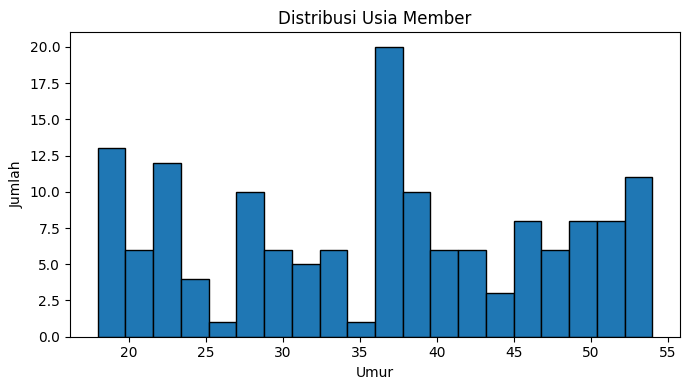

In [67]:
# Visualisasi Data

# Distibusi Usia
plt.figure(figsize=(7,4))
df['Age'].plot(kind='hist', bins=20, edgecolor='black')
plt.title('Distribusi Usia Member')
plt.xlabel('Umur')
plt.ylabel('Jumlah')
plt.tight_layout()
plt.savefig("1_distribusi_usia.png")
plt.show()


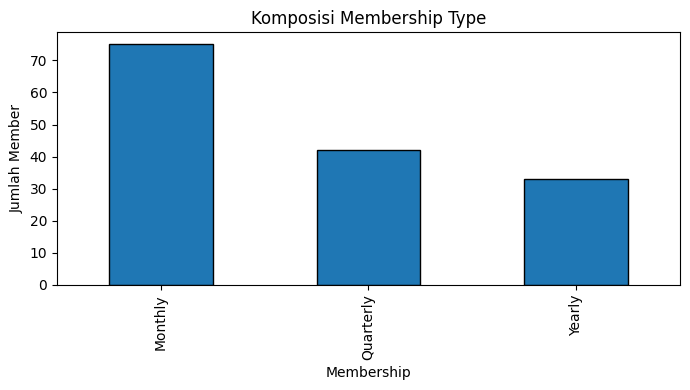

In [68]:
# Komposis Membership Type
plt.figure(figsize=(7,4))
df['Membership_Type'].value_counts().plot(kind='bar', edgecolor='black')
plt.title('Komposisi Membership Type')
plt.xlabel('Membership')
plt.ylabel('Jumlah Member')
plt.tight_layout()
plt.savefig("2_membership_type.png")
plt.show()

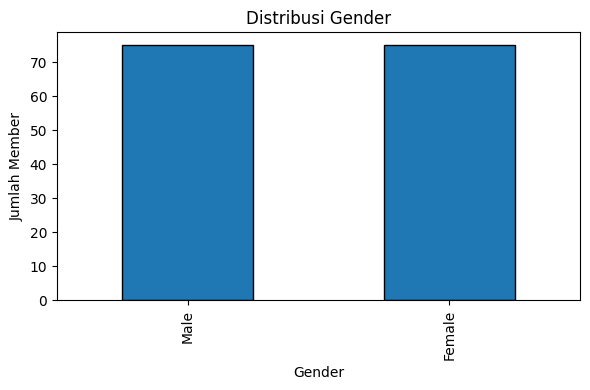

In [69]:
# Distribusi Gender
plt.figure(figsize=(6,4))
df['Gender'].value_counts().plot(kind='bar', edgecolor='black')
plt.title('Distribusi Gender')
plt.xlabel('Gender')
plt.ylabel('Jumlah Member')
plt.tight_layout()
plt.savefig("3_gender_distribution.png")
plt.show()

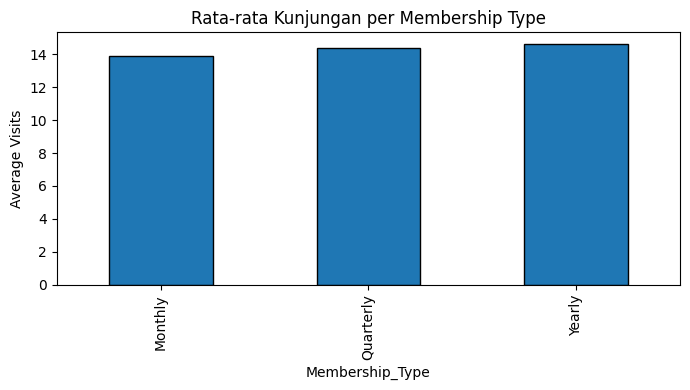

In [70]:
# Rata-Rata Kunjungan/Membership
plt.figure(figsize=(7,4))
df.groupby('Membership_Type')['Visits_Per_Month'].mean().plot(kind='bar', edgecolor='black')
plt.title('Rata-rata Kunjungan per Membership Type')
plt.ylabel('Average Visits')
plt.tight_layout()
plt.savefig("4_avg_visits_membership.png")
plt.show()

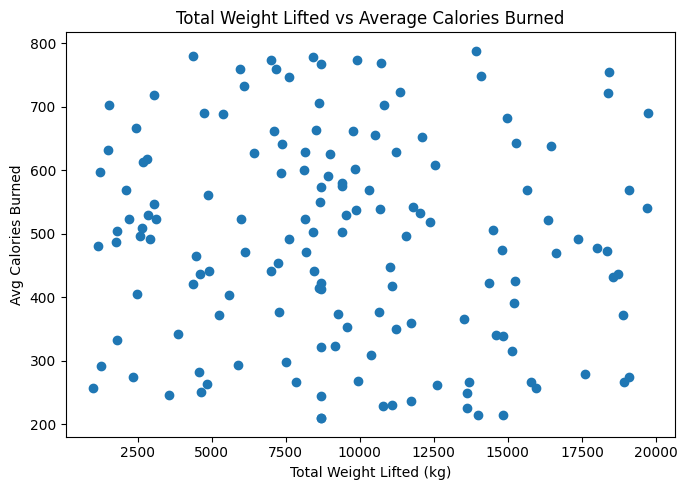

In [71]:
# Weight Lifted vs Calories Burned
plt.figure(figsize=(7,5))
plt.scatter(df['Total_Weight_Lifted_kg'], df['Avg_Calories_Burned'])
plt.title('Total Weight Lifted vs Average Calories Burned')
plt.xlabel('Total Weight Lifted (kg)')
plt.ylabel('Avg Calories Burned')
plt.tight_layout()
plt.savefig("5_scatter_weight_vs_calories.png")
plt.show()

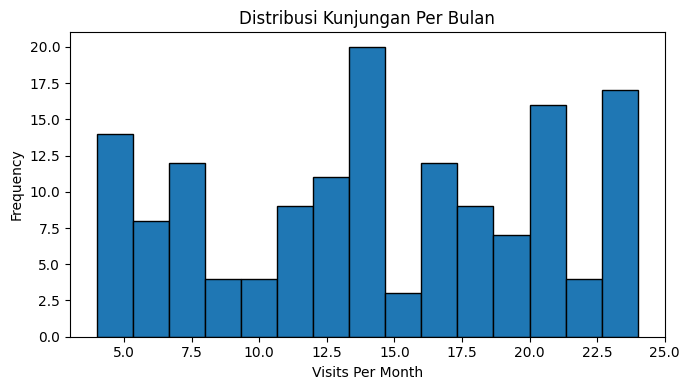

In [72]:
# Distribusi Visit/Month
plt.figure(figsize=(7,4))
df['Visits_Per_Month'].plot(kind='hist', bins=15, edgecolor='black')
plt.title('Distribusi Kunjungan Per Bulan')
plt.xlabel('Visits Per Month')
plt.tight_layout()
plt.savefig("6_visits_distribution.png")
plt.show()

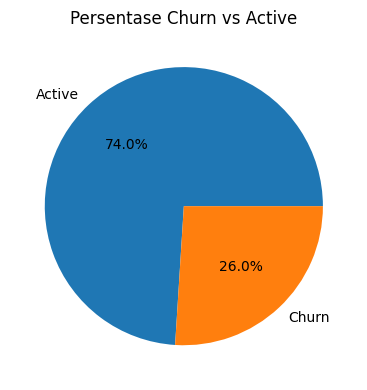

In [73]:
# Persentase Churn vs Active
plt.figure(figsize=(6,4))
df['Churn'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Persentase Churn vs Active')
plt.ylabel('')
plt.tight_layout()
plt.savefig("7_churn_percentage.png")
plt.show()


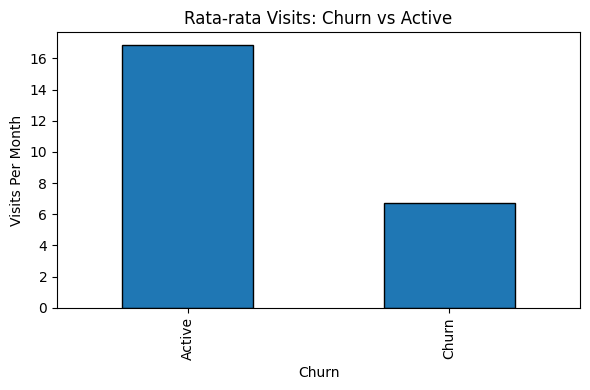

In [74]:
# Rata-rata Visits Churn vs Active
plt.figure(figsize=(6,4))
df.groupby('Churn')['Visits_Per_Month'].mean().plot(kind='bar', edgecolor='black')
plt.title('Rata-rata Visits: Churn vs Active')
plt.ylabel('Visits Per Month')
plt.tight_layout()
plt.savefig("8_avg_visits_churn.png")
plt.show()

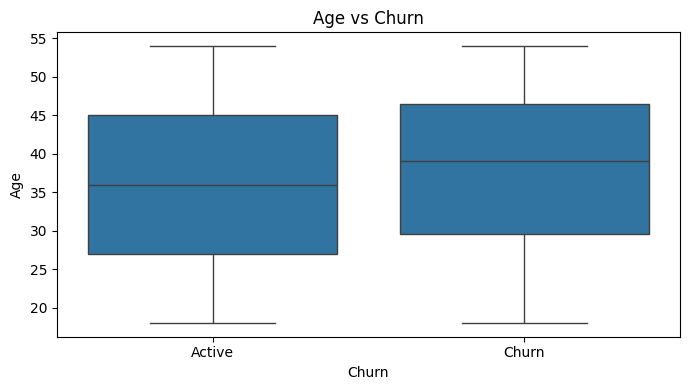

In [75]:
# Boxplot Age vs Churn
plt.figure(figsize=(7,4))
sns.boxplot(x='Churn', y='Age', data=df)
plt.title('Age vs Churn')
plt.tight_layout()
plt.savefig("9_boxplot_age_churn.png")
plt.show()

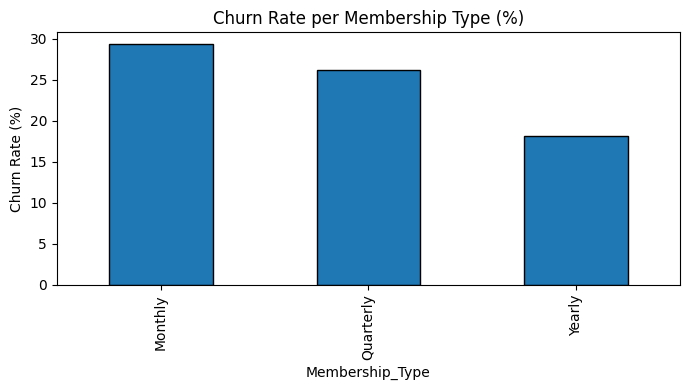

In [76]:
# Chrun Rate/Membership Types
df['Churn_Num'] = df['Churn'].map({'Churn': 1, 'Active': 0})
churn_rate = df.groupby('Membership_Type')['Churn_Num'].mean() * 100

plt.figure(figsize=(7,4))
churn_rate.plot(kind='bar', edgecolor='black')
plt.title('Churn Rate per Membership Type (%)')
plt.ylabel('Churn Rate (%)')
plt.tight_layout()
plt.savefig("10_churn_rate_membership.png")
plt.show()

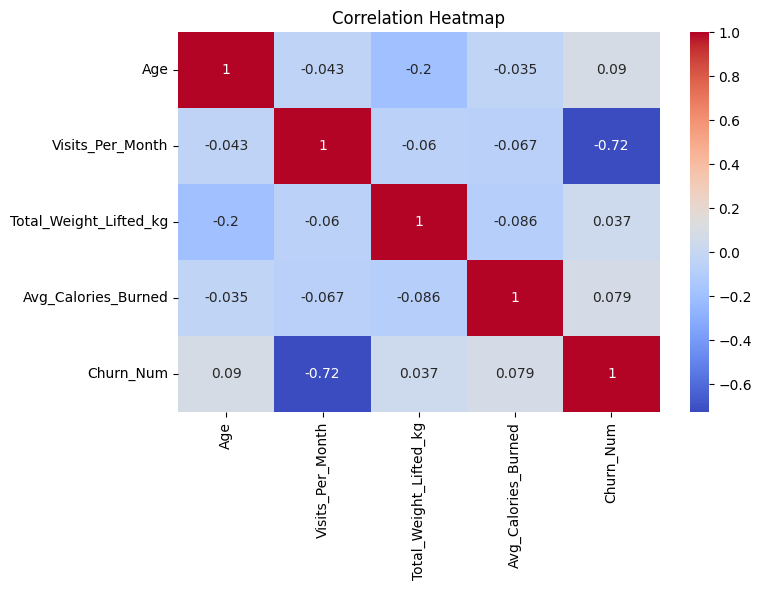

In [77]:
# Korelasi Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df[['Age','Visits_Per_Month','Total_Weight_Lifted_kg','Avg_Calories_Burned','Churn_Num']].corr(),
            annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.savefig("11_correlation_heatmap.png")
plt.show()